In [1]:
import pandas as pd

# Load the saved file
df = pd.read_csv("../data/pcod_sentiment_emotion.csv")

df.head()

,subreddit,id,title,body,created,score,comments,full_text,cleaned_text,sentiment_scores,...,sentiment_label,emotion_scores,anger,disgust,fear,joy,neutral,sadness,surprise,dominant_emotion
0,PCOD,1o15k9e,Help with pcod routine please 🥺,I'm 23/F and got diagnosed with pcod/pcos in J...,2025-10-08 05:13:30,2,10,Help with pcod routine please 🥺 I'm 23/F and g...,help pcod routine please im f got diagnosed pc...,"{'LABEL_0': 0.2149903029203415, 'LABEL_1': 0.6...",...,Neutral,"{'anger': 0.026252450421452522, 'disgust': 0.0...",0.026252,0.001100,0.005829,0.049896,0.122957,0.661893,0.132073,sadness
1,PCOD,1o08fbs,PCOD and spotting during Jogging,I always wished to have a body that can do HII...,2025-10-07 03:45:24,3,2,PCOD and spotting during Jogging I always wish...,pcod spotting jogging always wished body hiit ...,"{'LABEL_0': 0.040413208305835724, 'LABEL_1': 0...",...,Neutral,"{'anger': 0.030216267332434654, 'disgust': 0.0...",0.030216,0.002490,0.016535,0.031060,0.084444,0.651861,0.183393,sadness
2,PCOD,1nzq2u7,Building a better tracking app - am I focused ...,"Hi everyone, I'm a developer who also has PCOD...",2025-10-06 13:49:46,1,4,Building a better tracking app - am I focused ...,building better tracking app focused right pro...,"{'LABEL_0': 0.21276012063026428, 'LABEL_1': 0....",...,Neutral,"{'anger': 0.9085428714752197, 'disgust': 0.000...",0.908543,0.000894,0.001657,0.009122,0.011872,0.051547,0.016366,anger
3,PCOD,1nvdvd2,My client reversed 13 year old pcod,"13 years, tired of trying all the things in ma...",2025-10-01 13:01:52,3,0,"My client reversed 13 year old pcod 13 years, ...",client reversed year old pcod year tired tryin...,"{'LABEL_0': 0.08836515247821808, 'LABEL_1': 0....",...,Neutral,"{'anger': 0.023780541494488716, 'disgust': 0.0...",0.023781,0.001407,0.004636,0.262257,0.476801,0.143135,0.087983,neutral
4,PCOD,1nv9u10,is it possible to get pregnant with pcod/pcos?,I have been suffering from PCOD for the longes...,2025-10-01 10:32:38,1,1,is it possible to get pregnant with pcod/pcos?...,possible get pregnant pcodpcos suffering pcod ...,"{'LABEL_0': 0.30627697706222534, 'LABEL_1': 0....",...,Neutral,"{'anger': 0.011418251320719719, 'disgust': 0.0...",0.011418,0.000317,0.001642,0.036219,0.002486,0.939009,0.008908,sadness


In [2]:
# pip install sentence-transformers scikit-learn matplotlib

In [3]:
# pip install umap-learn

In [4]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

texts = df['cleaned_text'].tolist()

# Load the sentence transformer model
# model = SentenceTransformer('all-MiniLM-L6-v2')
model = SentenceTransformer('all-mpnet-base-v2')
# model = SentenceTransformer('BAAI/bge-base-en-v1.5')


# Compute sentence embeddings
embeddings = model.encode(texts, show_progress_bar=True)

/Users/rajanya/Documents/PCOD/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|███████████████████████████████████| 11/11 [00:04<00:00,  2.56it/s]


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


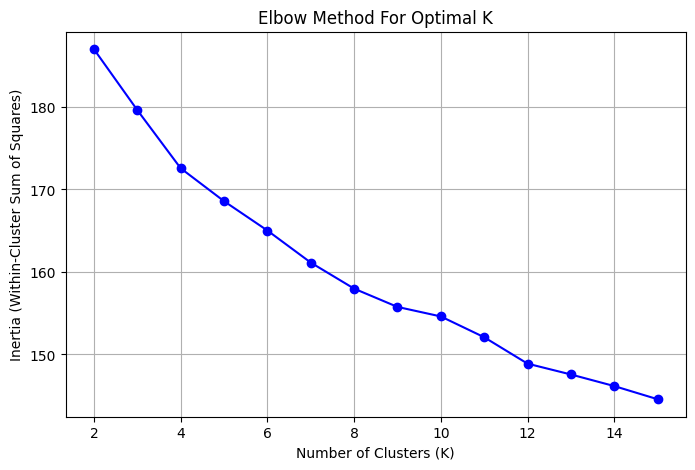

In [5]:
# Try K from 2 to 15
inertia = []
K_range = range(2, 16)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

In [6]:
import umap
umap_model = umap.UMAP(n_neighbors=15, n_components=10, random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


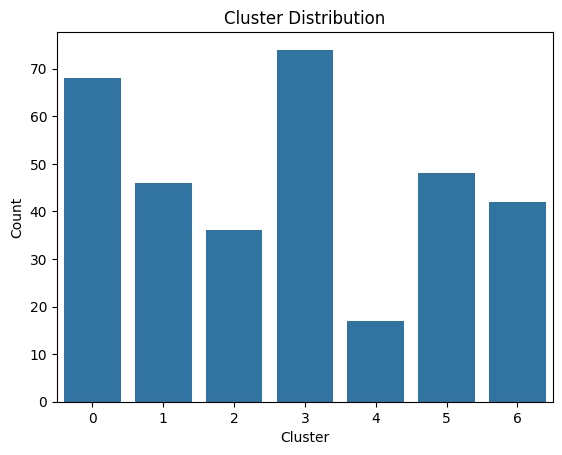


📌 Cluster 0:
                                         cleaned_text dominant_emotion  \
4   possible get pregnant pcodpcos suffering pcod ...          sadness   
9   got diagnosed pcod recently got diagnosed pcod...          sadness   
12  month since diagnosis pcod thyroid med diet te...         surprise   
13  pcod thyroid issue hello first ever post neede...         surprise   
19  excruciating pain got diagnosed pcod im took p...          sadness   

   sentiment_label  
4          Neutral  
9          Neutral  
12         Neutral  
13        Negative  
19        Negative  

📌 Cluster 1:
                                         cleaned_text dominant_emotion  \
1   pcod spotting jogging always wished body hiit ...          sadness   
15  trapic mf working prolonged bleeding hi first ...         surprise   
16  urgent brown discharge instead period hi f sid...          neutral   
18  excessive period hi f suffer pcod getting peri...          sadness   
23  bleeding wont stop bleeding

In [7]:
# For now, use K=5 based on your plot
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(reduced_embeddings)

# =========================
# 6. Visualize distribution of clusters
# =========================
sns.countplot(x='cluster', data=df)
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# =========================
# 7. Analyze representative posts per cluster
# =========================
for i in range(k):
    print(f"\n📌 Cluster {i}:")
    print(df[df['cluster'] == i][['cleaned_text', 'dominant_emotion', 'sentiment_label']].head(5))

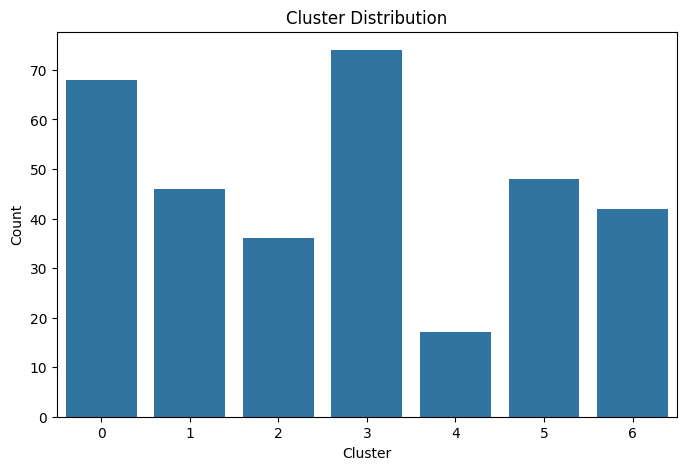

🔍 Top words for each cluster (for understanding):

📌 Cluster 0 - Top Words: doctor, dont, feel, im, ive, like, pcos, period, symptom, year
                                         cleaned_text dominant_emotion  \
4   possible get pregnant pcodpcos suffering pcod ...          sadness   
9   got diagnosed pcod recently got diagnosed pcod...          sadness   
12  month since diagnosis pcod thyroid med diet te...         surprise   

   sentiment_label  
4          Neutral  
9          Neutral  
12         Neutral  

📌 Cluster 1 - Top Words: bleeding, day, im, ive, like, month, normal, pcos, period, year
                                         cleaned_text dominant_emotion  \
1   pcod spotting jogging always wished body hiit ...          sadness   
15  trapic mf working prolonged bleeding hi first ...         surprise   
16  urgent brown discharge instead period hi f sid...          neutral   

   sentiment_label  
1          Neutral  
15         Neutral  
16         Neutral  

📌 Cluste

,cleaned_text,cluster,cluster_name
0,help pcod routine please im f got diagnosed pc...,5,Lifestyle Tips & Support Journeys
1,pcod spotting jogging always wished body hiit ...,1,Menstrual Irregularities & Bleeding Issues
2,building better tracking app focused right pro...,2,Weight & Motivation Challenges
3,client reversed year old pcod year tired tryin...,5,Lifestyle Tips & Support Journeys
4,possible get pregnant pcodpcos suffering pcod ...,0,Diagnosis & Fertility Stress
5,facial hair facing problem since last year ear...,6,Hair & Appearance Concerns
6,help pcod journey would want hey girlies someo...,5,Lifestyle Tips & Support Journeys
7,weight gain hairfall emotional breakdown im ye...,2,Weight & Motivation Challenges
8,nari saundarya malt help year old girl facing ...,5,Lifestyle Tips & Support Journeys
9,got diagnosed pcod recently got diagnosed pcod...,0,Diagnosis & Fertility Stress


In [8]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# agg = AgglomerativeClustering(n_clusters=6)
# labels = agg.fit_predict(reduced_embeddings)

# Step 1: Clustering
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(reduced_embeddings)

# Step 2: Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=df)
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Step 3: Print Top Words per Cluster (for analysis only)
print("🔍 Top words for each cluster (for understanding):")
for i in range(k):
    cluster_texts = df[df['cluster'] == i]['cleaned_text']
    tfidf = TfidfVectorizer(stop_words='english', max_features=10)
    tfidf_matrix = tfidf.fit_transform(cluster_texts)
    top_words = tfidf.get_feature_names_out()
    print(f"\n📌 Cluster {i} - Top Words: {', '.join(top_words)}")
    print(df[df['cluster'] == i][['cleaned_text', 'dominant_emotion', 'sentiment_label']].head(3))

# Step 4: Assign Human-Readable Cluster Names
cluster_labels = {
    0: "Diagnosis & Fertility Stress",
    1: "Menstrual Irregularities & Bleeding Issues",
    2: "Weight & Motivation Challenges",
    3: "Product Feedback & Medication Discussions",
    4: "PCOS Awareness & Surveys",
    5: "Lifestyle Tips & Support Journeys",
    6: "Hair & Appearance Concerns"
}
df['cluster_name'] = df['cluster'].map(cluster_labels)

# # ✅ Optional: Save keywords if needed (separate from human-readable names)
# df['cluster_keywords'] = df['cluster'].map(lambda x: ', '.join(
#     TfidfVectorizer(stop_words='english', max_features=10)
#     .fit(df[df['cluster'] == x]['cleaned_text'])
#     .get_feature_names_out()
# ))

# Step 5: Preview Final Result
df[['cleaned_text', 'cluster', 'cluster_name']].head(20)

In [9]:
df.to_csv("../data/kmeans_clustered.csv", index=False)

In [10]:
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_embeddings, df['cluster'])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.3603


In [11]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(reduced_embeddings, df['cluster'])
print(f"Davies–Bouldin Score: {db_score:.4f}")

Davies–Bouldin Score: 0.9406


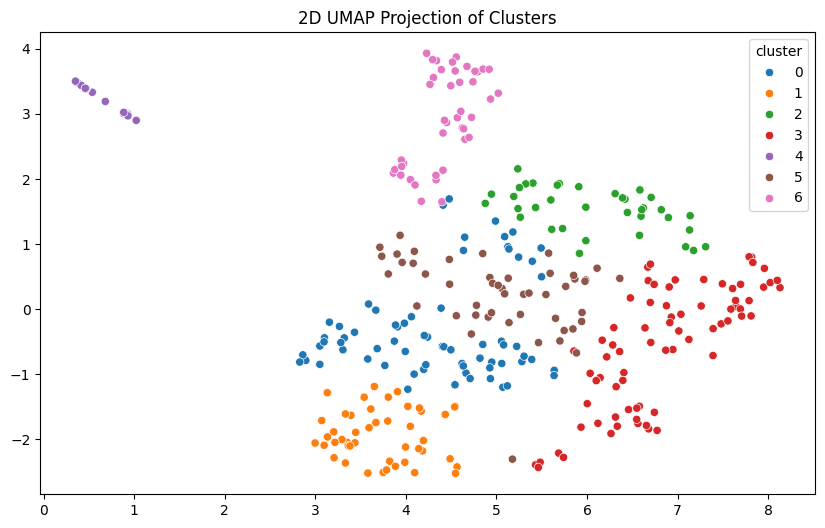

In [12]:
umap_2d = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
embedding_2d = umap_2d.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=embedding_2d[:, 0], y=embedding_2d[:, 1], hue=df['cluster'], palette='tab10')
plt.title("2D UMAP Projection of Clusters")
plt.show()

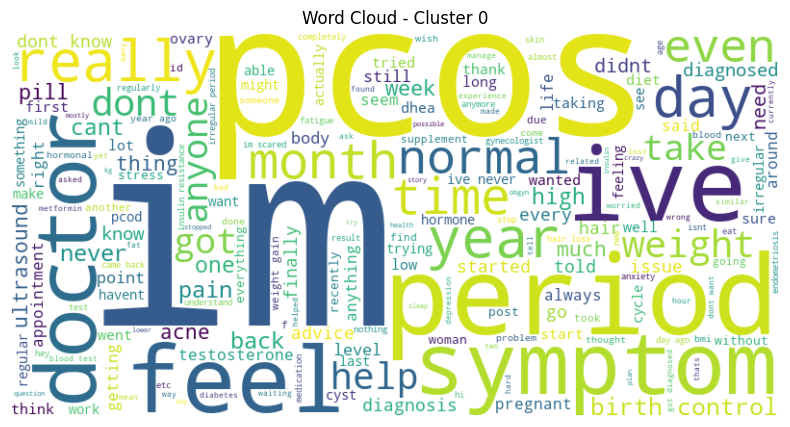

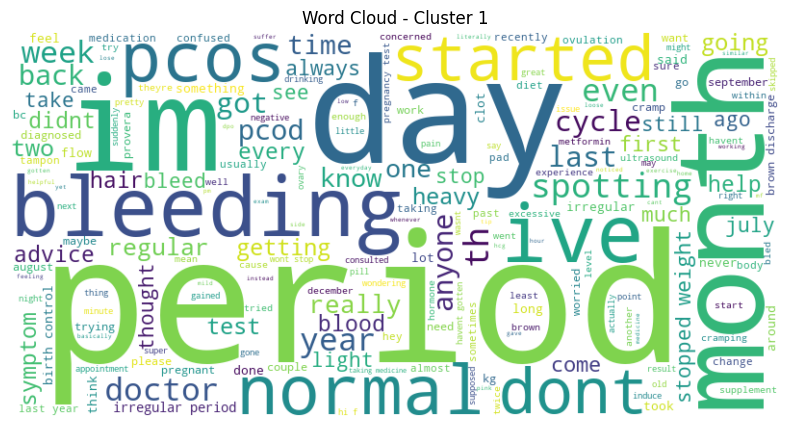

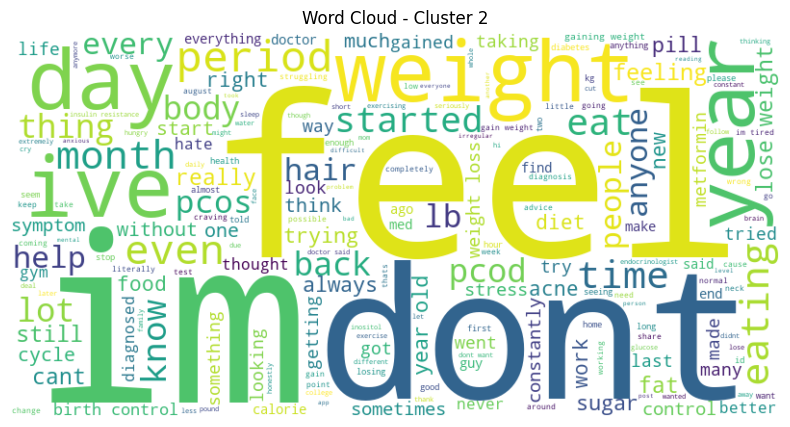

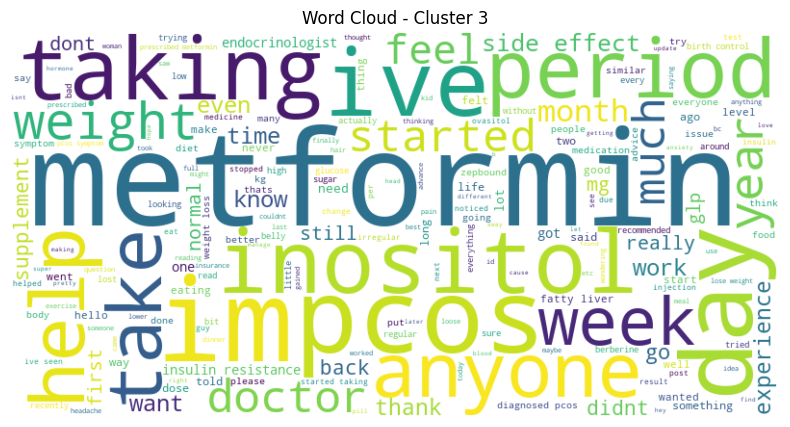

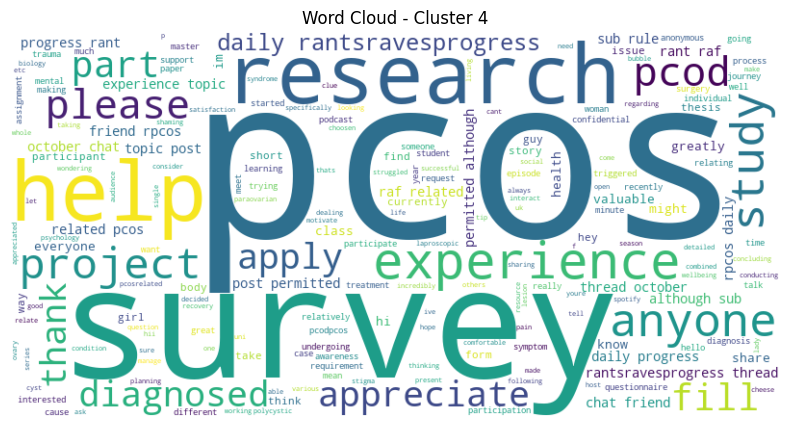

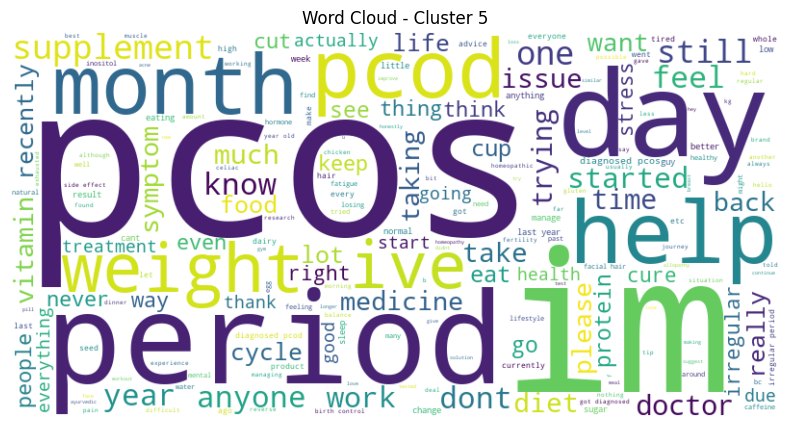

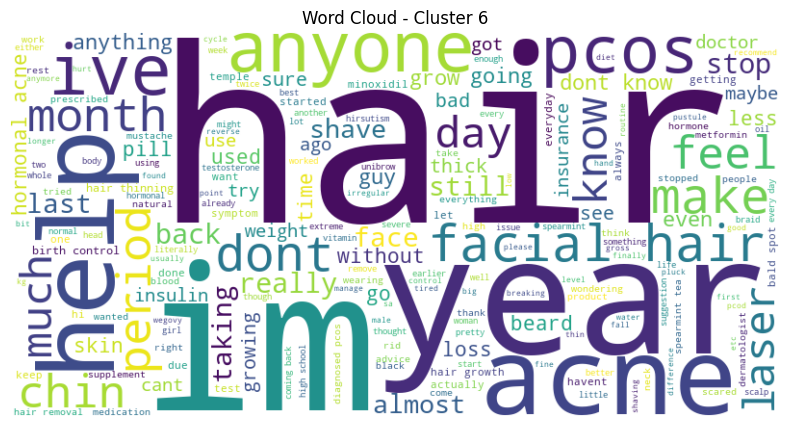

In [13]:
from wordcloud import WordCloud

for i in range(k):
    cluster_text = " ".join(df[df['cluster'] == i]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - Cluster {i}')
    plt.show()